The following script consists of a Python version of Andrew Ng Stanford Course 'Machine Learning' taught on the Coursera Platform
Note: All exercise data and structure are credited to Stanford University 

Caveat: Contrary to the modularity presented in Octave scripts and as I'm using Jupyter Notebooks for educational purposes we will implement the functions on the same notebook where we will call them

# Exercise 1 - Plotting the Data

In [1]:
#Import numpy libraries to deal with matrixes and vectors
import numpy as np
#Import pandas do read data files
import pandas as pd
#Import matplotlib to plot data
import matplotlib.pyplot as plt

#Import math 
import math 

#Import scipy optimization function
from scipy import optimize

#Matplotlib notebook property
%matplotlib inline

In [2]:
#Read Text File and create X and y variables
ex2_file = pd.read_csv('ex2data2.txt', header=None) 
X = np.array(ex2_file.iloc[:,0:2])
y = np.array(ex2_file.iloc[:,2])


print('# of training examples: {}'.format(len(X)))
m = len(X)

# of training examples: 118


The data describes a situation of a fabrication plant of microchips. Each microchip passes two different quality tests and the plant manager wants to know how can he map the chips that were accepted and rejected.

The result of each test is mapped in each variable of the X array and the result of accept/reject is mapped in the y variable.

Plotting the dataset:

In [3]:
def plotData(
    X: np.array,
    y: np.array
):
    '''
    Plots a 2D scatter plot with each chip 
    by Test 1 and Test 2.
    Accepted microchips are marked has a '+'
    and rejected ones are marked as an 'o'
    
    Args:
        X(np.array): Data with Test 1 and Test 2 results.
        y(np.array): Outcome with chip acceptance result.
    Returns:
        None
    '''
    plt.scatter(X[y==0,0], X[y == 0,1], marker='o', edgecolors='black', color='yellow')
    plt.scatter(X[y==1,0], X[y == 1,1], marker='+', facecolors='none', c='black')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(('Rejected','Accepted'), loc='best', bbox_to_anchor=(1, 0.5))

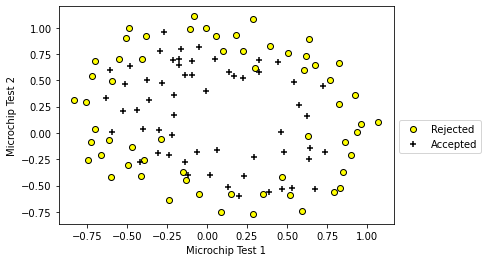

In [4]:
#Plot our data showing + marker for Accepted examples and 'o' marker for Rejected ones
plotData(X,y)

We have a binary target - we should try to fit a logistic regression.
<br>
The following exercise has two objectives: 
    - Teaching about regularization and how it can be used as a tool to avoid overfitting;
    - Use polynomial features to enhance linear models;
    
<br>
<br>
The equations for the cost function and gradient with regularization are as follows - the regularization part consists of the second part of each equation that depends on λ):

<img src="assets/CostFunctionRegularization.JPG">

<img src="assets/GradientRegularization.JPG">

Notice how the lambda parameter controls the regularization both for the cost function and the gradient.
<br>
A higher lambda (λ) parameter means a higher penalty on coefficients and thus a less capability of our features to impact our models' outcome.

# Exercise 2 -  Regularization

In [5]:
# Note that there is impossible to use a line to separate these points. 
# We can't really find a way to cut the classes like the previous exercise 

# We want a kind of circle that isolate our plot in our linear features - so we will try to do a polynomial space to isolate this!
# We will keep the polynomial degree = 6


def mapFeature(
    X1: np.array, 
    X2: np.array
)-> np.array: 
    """
    Map polinomial features until 6th degree
    
    Args:
        X1(np.array): First column of the features.
        X2(np.array): Second column of the features.
        
    Returns:
        out(np.array): Result of polynomial features of degree 6
    """
    #Add column of ones to the array 
    out = np.ones((X1.shape[0],1))
    degree = 6
    for i in range(1,degree+1):
        for j in range(0,i+1):
            new_poly_feature = (X1**(i-j))*(X2**j)
            out = np.hstack((out, new_poly_feature.reshape(len(out),1)))
    return out

In [6]:
# Create polynomial features
X_Poly = mapFeature(X[:,0], X[:,1])

Let's initialize a dummy theta array:

In [7]:
# Initialize the Theta parameters 
initial_theta = np.zeros(X_Poly.shape[1])

In [8]:
#Set lambda to 1 - renaming it lambdas python has the keyword lambdas
lambdas = 1 

In [9]:
#Define sigmoid function 
def sigmoid(
    x: np.array
)-> np.array:
    """
    Computes sigmoid value of array x
    
    Args:
        x(np.array): Array with original hypothesis
    Returns:
        (np.array): Array with the resulting sigmoid
    """
    return(1 / (1 + np.exp(-x)))

In [10]:
# Define cost and gradient with regularization
def costFunctionReg(
    theta: np.array,
    X: np.array, 
    y: np.array, 
    lambdas: int
) -> [int, np.array]:
    """
    Defines cost function with regulariation
    and computes gradient.
    
    Args:
        theta(np.array): Initial theta values;
        X(np.array): Original features.
        y(np.array): Target value / outcome
        lambdas(int): lambda applied for regularization
    """
    m = len(X)
    
    # Penalize cases where the algorithm misclassified true positives
    cost_function_1 = np.dot(-y.T,np.log(sigmoid(np.dot(theta.T,X.T))))
    # Penalize cases where the algorithm misclassified true negatives
    cost_function_2 = np.dot((1-y).T,np.log(1-sigmoid(np.dot(theta.T,X.T))))
    
    # Calculate cost function without regularization
    J = (1/m) * (cost_function_1 - cost_function_2)
    # Apply regulatization to cost function
    J = J+((lambdas/(2*m))*sum(theta[1:]**2))
    
    reg = (lambdas/m)*theta
    
    # Theta0 is not regularized
    reg[0] = 0 
    
    # Initialize Gradient
    grad = (sigmoid(np.dot(theta.T, X.T)) - y.T)
    
    # Apply regularization
    grad = (np.dot(grad,X)/m).T + reg
    
    return J, grad

In [11]:
cost, grad = costFunctionReg(initial_theta, X_Poly, y, lambdas)

In [12]:
print('Cost at initial theta is {}'.format(np.round(cost,3)))
print('Gradient at initial theta is {}'.format(np.round(grad,3)))

Cost at initial theta is 0.693
Gradient at initial theta is [0.008 0.019 0.    0.05  0.012 0.038 0.018 0.007 0.008 0.023 0.039 0.002
 0.013 0.003 0.039 0.02  0.004 0.003 0.006 0.004 0.031 0.031 0.001 0.006
 0.    0.007 0.001 0.039]


In [13]:
#Check cost function and gradient with vector of thetas = 1 and lambda = 10
test_theta = np.ones(X_Poly.shape[1])
lambdas = 10

In [14]:
cost, grad = costFunctionReg(test_theta, X_Poly, y, lambdas)

In [15]:
print('Cost at initial theta is {}'.format(np.round(cost,3)))
print('Gradient at initial theta is {}'.format(np.round(grad,3)))

Cost at initial theta is 3.165
Gradient at initial theta is [0.346 0.161 0.195 0.227 0.092 0.244 0.143 0.108 0.102 0.183 0.174 0.087
 0.118 0.086 0.2   0.135 0.095 0.094 0.1   0.091 0.175 0.15  0.087 0.099
 0.085 0.102 0.085 0.182]


# Exercise 3 -  Regularization and Accuracies

Just as we have done in other regression problems, we will minimize our cost function in function of theta.

In [16]:
# Initialize the Theta parameters with 0's

initial_theta = np.zeros(X_Poly.shape[1])

In [17]:
# Set lambda to 1 
lambdas = 1

In [18]:
# set options for optimize.minimize
options= {'maxiter': 400}

# implementation based on Gerges Dib (github user:dibgerge) - optimizing our costFunction using scipy optimize library. 
# We minimize the cost function starting on the initial theta 
# TNC means Truncated Newton Algorithm and maxiter is set to 400 to match the implementation of Andrew octave script

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X_Poly, y, lambdas),
                        jac=True,
                        method='TNC',
                        options=options)

In [19]:
cost = res.fun
opt_theta = res.x
print('Optimal cost found by optimize method: {}'.format(float(res.fun)))
print('Optimal theta vector found by optimize method: {}'.format(opt_theta))

Optimal cost found by optimize method: 0.5290027299645134
Optimal theta vector found by optimize method: [ 1.27271027  0.62529965  1.18111687 -2.01987399 -0.91743189 -1.43166931
  0.12393227 -0.36553118 -0.35725403 -0.17516292 -1.4581701  -0.05098418
 -0.61558553 -0.27469165 -1.19271297 -0.2421784  -0.20603299 -0.04466178
 -0.27778951 -0.29539514 -0.45645981 -1.04319155  0.02779373 -0.2924487
  0.0155576  -0.32742405 -0.1438915  -0.92467487]


We were able to minimize our log loss average function to ~0.53, a huge improvement from our initial values with an arbitrary theta. How is our decision boundary behaving with this regularized polynomial regression?

In [20]:
def plotDecisionBoundary(
    optimal_theta: np.array, 
    X: np.array,
    y: np.array
)-> None:
    '''
    Plots decision boundary between classes
    y = 0 and y = 1 using X*optimal theta calculation
    
    Args:
        optimal_theta(np.array): The weights that will be applied to each of the variables.
        X(np.array): The values of the original variables - Test 1 and Test 2 for each chip.
        y(np.array): The outcome of each chip.
        
    Returns:
        None
    '''
    plotData(X,y)
    # Plot contour to get the decision boundary 
    # Use a linear space to plot the contour over each hypothesis calculated 
    
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros([len(u), len(v)])    
    
    for i in np.arange(0,u.shape[0]):
        for j in np.arange(0,v.shape[0]):
            temp = np.array(u[i])
            z[i,j] = np.dot(mapFeature(np.array(u[i]).reshape(1), np.array(v[j]).reshape(1)), optimal_theta)
    
    plt.contour(u,v,z.T,0)

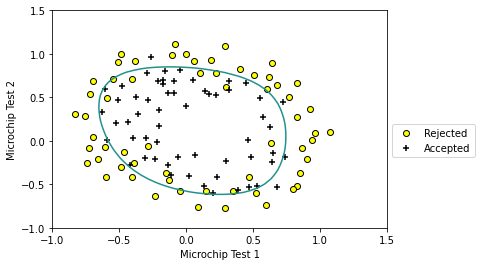

In [21]:
plotDecisionBoundary(opt_theta, X,y)

We can finally take a look at our accuracy: 

In [22]:
# Computing the Accuracy for out training Set
def predict(theta: np.array, 
            X: np.array, thres: float)-> np.array:
    #Add column of ones to the array 
    m = len(X)
    p = sigmoid(np.dot(X, theta.T))
    p = np.where(p>= thres,1,0)
    return p

In [23]:
p = predict(opt_theta, X_Poly, 0.5)

In [24]:
# Check the accuracy of our model 
print('We have got {:.0%} of the examples of the training set using a decision boundary of 50%'.format(sum(p == y)/len(X_Poly)))

We have got 83% of the examples of the training set using a decision boundary of 50%
